In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # for arange


In [9]:

from sklearn.model_selection import train_test_split # importamos las funciones para dividir los datos
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # importamos los modelos de random forest
import os # para trabajar con el sistema operativo
import joblib # para guardar el modelo entrenado

def fit_model(train_data, x_cols, y_cols, model, 
    out_filename = './../fitted_RF/trained_model', save = True):
    """
    Entrena un modelo de random forest.
    train_data: dataframe con los datos de entrenamiento
    x_cols: lista con los nombres de las columnas de entrada del modelo
    y_cols: lista con los nombres de las columnas de salida del modelo
    out_filename: string con la ruta y nombre del archivo donde se guardará el modelo
    model: instancia del modelo a entrenar
    """
    X = train_data[x_cols] # separamos las columnas de entrada
    y = train_data[y_cols] # separamos las columnas de salida
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.1) # dividimos los datos en entrenamiento y test
    
    clf = model.fit(X.values, y.values) # entrenamos el modelo
    
    if save:
        # guardamos el modelo en disco
        if not os.path.exists(models_path + '/fitted_RF/'):
            os.makedirs(models_path + '/fitted_RF/')
        joblib.dump(model, out_filename, compress=3)
        print('saved model at: ' + out_filename)
        del clf

    else:
        return model, X_test, y_test
#     print(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)[:5])

    del X; del y # liberar memoria eliminando los dataframes mas pesados

In [4]:
# Column names
y_cols = ['CAT_OCUP', 'P47T', 'PP10E', 'PP10D', 'PP07K', 'PP07I', 'V3_M', 'PP07G4', 'CH16', 'T_VI', 
          'V12_M', 'TOT_P12', 'PP07G3', 'V5_M', 'PP07H', 'V2_M', 'PP10C', 
          'PP08D1', 'PP07J', 'CAT_INAC', 'CH07', 'CH08', 'P21', 'PP07G1', 'PP07G_59', 'PP07G2']

x_cols1 = ['IX_TOT', 'P02', 'P03', 'AGLO_rk', 'Reg_rk', 'V01', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14',
       'H13', 'P07', 'P08', 'P09', 'P10', 'P05', 'CONDACT']

predecir1 = ['CAT_OCUP', 'CAT_INAC', 'CH07']

x_cols2 = x_cols1 + predecir1
predecir2 = ['INGRESO', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']

x_cols3 = x_cols2 + predecir2
# La seccion PP07G pregunta si el trabajo es en blanco y que beneficios tiene. Puede ayudar a la regresion para ingresos.
# predecir3 = ['PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K']
predecir3 = ['PP07G1','PP07G_59', 'PP07I', 'PP07J', 'PP07K']

# Columnas de ingresos. Necesitan una regresion...
columnas_pesos = [u'P21', u'P47T', u'PP08D1', u'TOT_P12', u'T_VI', u'V12_M', u'V2_M', u'V3_M', u'V5_M']

x_cols4 = x_cols3 + predecir3
# Columnas de ingresos. Necesitan una regresion...
predecir4 = columnas_pesos
y_cols4 = predecir4

In [23]:
## Elegir informacion de entrenamiento

yr = '2019'
data = pd.read_csv('./../data/training/EPHARG_train_'+yr[2:]+'.csv')

u_yr = str(int(yr) - 2)
u_data = pd.read_csv('./../data/training/EPHARG_train_'+u_yr[2:]+'.csv')



In [81]:
# ## Pruebas a hacer:


# - Entrenar modelo con parametro de profundidad maxima en ascenso.
# - Entrenar modelo con parametro de cantidad de estimadores en ascenso.
# - Feature importance

## Mean Absolute Error

In [48]:
## Elegir clasificador a evaluar (Etapa 1, 2, 3...)

# Nombre del modelo de esta etapa:
model_name = 'RF_1'

# columnas de entrada y salida
x_cols , y_cols = x_cols1, predecir1

array([ 2,  8, 14])

In [97]:
from sklearn.metrics import mean_absolute_error

### Definir Experimento

# Define the range of max_depth values to test
max_depths = np.arange(2, 28, 3)

# Define the number of repeated train test splits
n_splits = 8


## Loop
# Create an empty dataframe to store the results
df = pd.DataFrame([])

for j in range(n_splits):
    
    ## Test con datos de otro año
    X, y = u_data[x_cols], u_data[y_cols] # separamos las columnas de entrada y salida
    X, X_test1, y, y_test1 = train_test_split(X, y, test_size=0.1) # dividimos los datos en entrenamiento y test

    ## Train y Test (mismo año). Sobreescribe el training set recien definido.
    X, y = data[x_cols], data[y_cols] # separamos las columnas de entrada y salida
    X, X_test0, y, y_test0 = train_test_split(X, y, test_size=0.1) # dividimos los datos en entrenamiento y test

            
    for max_depth in max_depths:
        model = RandomForestClassifier(n_estimators=10, max_depth=max_depth, n_jobs=-1)
        clf = model.fit(X, y.values)
        train_mae = mean_absolute_error(y, clf.predict(X), multioutput='raw_values')
        test0_mae = mean_absolute_error(y_test0, clf.predict(X_test0), multioutput='raw_values')
        test1_mae = mean_absolute_error(y_test1, clf.predict(X_test1), multioutput='raw_values')
                        

        train_mae = pd.DataFrame(train_mae, index = y_cols).T.add_prefix('train_mae_')
        test0_mae = pd.DataFrame(test0_mae, index = y_cols).T.add_prefix('test0_mae_')
        test1_mae = pd.DataFrame(test1_mae, index = y_cols).T.add_prefix('test1_mae_')

        new_row = pd.DataFrame({'model_name': model_name,
        'max_depth': max_depth, 
        'n_estimators': 10,
        'repeat': j}, index = [0])

        row = pd.concat([new_row, train_mae, test0_mae, test1_mae], axis=1)

        df = pd.concat([df, row],ignore_index=True)

In [98]:
# Display the results
# display(df)
 
max_depth_mae = df.groupby(['model_name', 'max_depth', 'n_estimators']).mean()

# Si queremos tomar quantiles, por ejemplo, el 25% y el 75%:
# df.groupby(['model_name', 'max_depth', 'n_estimators']).agg([lambda x: x.quantile(q=.25),
# "mean", lambda x: x.quantile(q=.75)])


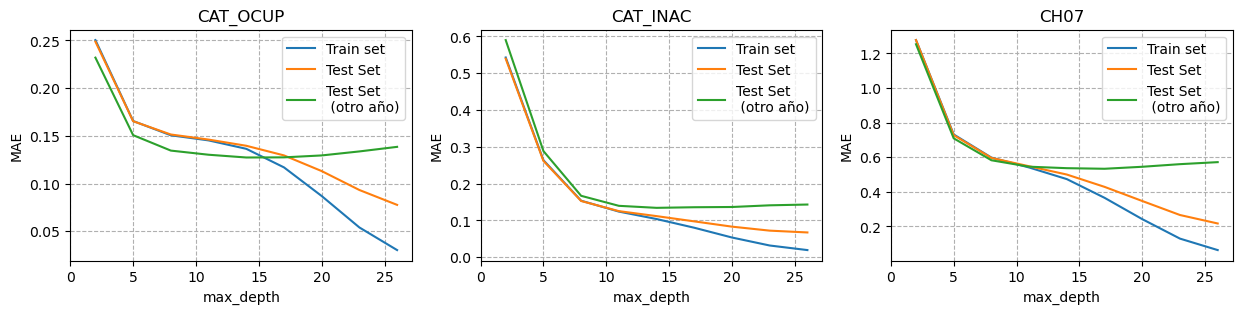

In [99]:
## Plot the results
fig, axs = plt.subplots(1, len(y_cols), figsize=(5*len(y_cols), 3))

for var in y_cols:
    plot_data = max_depth_mae[[col for col in max_depth_mae.columns if var in col]]
    plot_data = plot_data.set_index(plot_data.index.get_level_values(1))
    plot_data.plot(ax=axs[y_cols.index(var)], title=var)
    axs[y_cols.index(var)].set_xlabel('max_depth')
    axs[y_cols.index(var)].set_ylabel('MAE')
    axs[y_cols.index(var)].grid(linestyle = '--')

    # Set the x-ticks to the integer values
    tickslist = np.arange(0, 30, 5)
    axs[y_cols.index(var)].set_xticks(tickslist)
    axs[y_cols.index(var)].set_xticklabels(tickslist)

    # Set the legend
    axs[y_cols.index(var)].legend(labels=["Train set", "Test Set", "Test Set \n (otro año)"])
plt.show()

### Feature Importance

In [204]:
columnas_pesos = [u'P21', u'P47T', u'PP08D1', u'TOT_P12', u'T_VI', u'V12_M', u'V2_M', u'V3_M', u'V5_M']
# columnas_pesos = [u'P47T', u'P21']

In [205]:
from numpy import log10

In [223]:
# Nombre del modelo de esta etapa:
model_name = 'RF_4'

# columnas de entrada y salida
x_cols , y_cols = x_cols4, y_cols4

## Tomar log de las columnas en pesos.
data_ = data.copy()
# data_ = data_.loc[data_[columnas_pesos].sum(1) > 0]
data_[columnas_pesos] = log10(data_[columnas_pesos].clip(-.9) + 1)

## Train y Test (mismo año). Sobreescribe el training set recien definido.
X, y = data_[x_cols], data_[y_cols] # separamos las columnas de entrada y salida
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1) # dividimos los datos en entrenamiento y test

model = RandomForestRegressor(n_estimators=1, max_depth = 20, n_jobs = -1)
clf = model.fit(X.values, y.values) # entrenamos el modelo

# Extract feature importances
importance = clf.feature_importances_

# Format the results as a DataFrame
importance_df = pd.DataFrame(data={'feature': X.columns, 'importance': importance})
# importance_df.sort_values('importance', ascending=False, inplace=True)


In [224]:
# La columna maxima es P21 (ingreso ocup ppal) en 75% de las veces, P47T (ingreso total indiv) en 25% de las veces.
# data_[columnas_pesos].idxmax(1).value_counts()

## Importancia de variables por correlacion con la variable objetivo
col = 'P21'
correlation_df = pd.DataFrame(data_[x_cols].corrwith(data_[col]), columns = ['corrw'+col])

# # max
# col = 'max'
# correlation_df = pd.DataFrame(data_[x_cols].corrwith(data_[columnas_pesos].max(1)), 
#     columns = ['corrw'+col])

correlation_df = correlation_df.reset_index().rename(columns={'index': 'feature'})


In [225]:
df = correlation_df.merge(importance_df)
abs_corr = abs(df[[col for col in df.columns if 'corrw' in col]]).add_prefix('abs_')
log_fimp = log10(df[[col for col in df.columns if 'importance' in col]]).add_prefix('log_')
df = pd.concat([df, abs_corr, log_fimp], axis=1)

In [226]:
df.columns

Index(['feature', 'corrwP21', 'importance', 'abs_corrwP21', 'log_importance'], dtype='object')

In [227]:

# df.plot.scatter(x='abs_corrwP21', y='importance', title='Scatter plot')
# plt.xlabel('corrwP21')
# plt.ylabel('log_importance')
# plt.show()

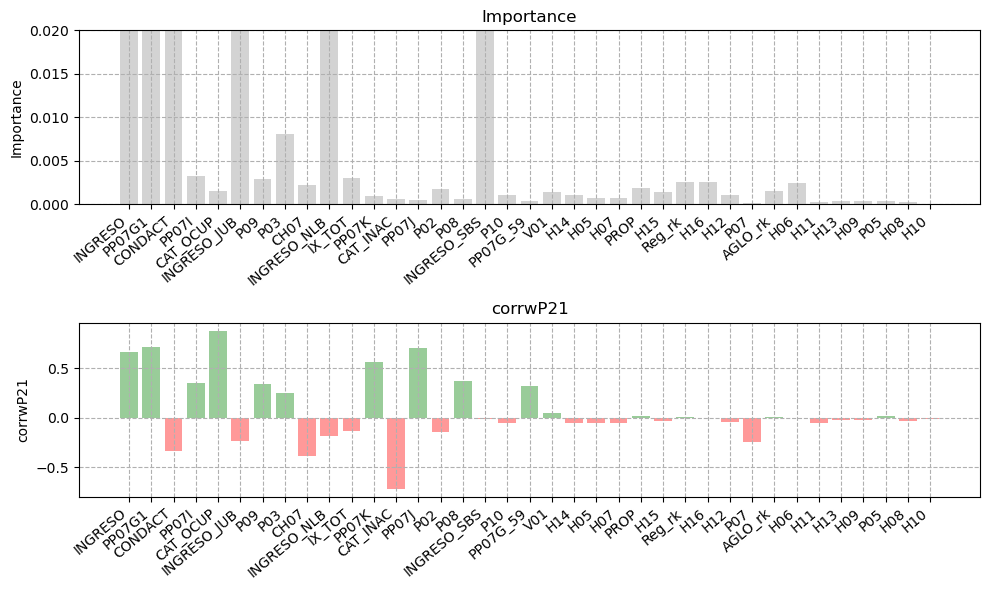

In [228]:
# Sort the dataframe by 'corrwP21' in ascending order
# df = df.sort_values(by='abs_corrwP21', ascending=False)
df = df.sort_values(by='importance', ascending=False)

df['sort'] = df['corrwP21'].abs().rank(ascending=False) + df.importance.rank(ascending=False)
df = df.sort_values(by='sort', ascending=True)


# Create the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the importance in the top subplot
axs[0].bar(df['feature'], df['importance'], color='lightgray')
axs[0].set_title('Importance')
axs[0].set_ylabel('Importance')
axs[0].set_ylim(0, .02)
axs[0].grid(linestyle='dashed')

# Plot the corrwP21 in the bottom subplot
axs[1].bar(df['feature'], df['corrwP21'], color=[ 'g' if x>0 else 'r' for x in df['corrwP21']], alpha = .4)
axs[1].set_title('corrwP21')
axs[1].set_ylabel('corrwP21')
axs[1].grid(linestyle='dashed')

# Set the x-tick labels for both subplots
# plt.setp(axs, xticks=range(len(df)), xticklabels=df['feature'], rotation=30)
# axs[0].set_xticklabels(df['feature'], rotation=30)
# axs[1].set_xticklabels(df['feature'], rotation=30)
axs[0].set_xticks(range(len(df)), df['feature'], rotation=40, fontsize = 10, ha = 'right')
axs[1].set_xticks(range(len(df)), df['feature'], rotation=40, fontsize = 10, ha = 'right')

plt.tight_layout()
plt.show()